# Case Study on Correlation and Regression

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv file
data=pd.read_csv('Add_sales_data_2018.csv')
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [3]:
#finding if there is any null value
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [4]:
#dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
#describing the data
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.


In [6]:
#Checking correlations
data.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

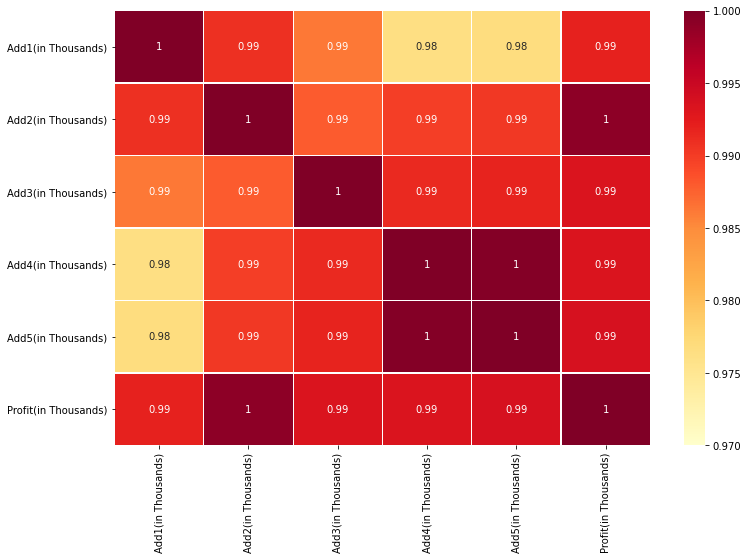

In [7]:
#To represent correlation using heatmap
corrmatrix=data.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corrmatrix,vmin=.97,vmax=1,annot=True,Linewidth=.2,cmap='YlOrRd')

So,we can conclude from the above heatmap that there is a high positive correlation between the amount spent on advertising through five different companies and the profit generated.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

## Splitting data into independent and dependent variables

In [8]:
#y-dependent variable
y=data['Profit(in Thousands)']

#x-independent variable
#dropping dependent variable and date
x=data.drop(['Profit(in Thousands)','Date'],axis=1)

## Splitting data into train and test set 

In [9]:
#importing train_test_split from model_selection class in scikit learn
from sklearn.model_selection import train_test_split
#defining x_train,x_test,y_train,y_test to split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## Building linear regression model

In [10]:
#importing linear_model from scikit learn
from sklearn.linear_model import LinearRegression
#finding linear regression
lin_reg = LinearRegression(normalize=True)
#creating model
model = lin_reg.fit(x_train,y_train)
#Predicting using created model
pred = model.predict(x_test)

In [11]:
#printing the predictions
print(pred)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457 4887.296 5805.521 4705.198 4404.686
 5465.277 4947.72  5185.639 5225.14  5111.806 5518.561]


## Evaluating the model

In [12]:
#importing mean_squared_error from metrics class in scikit learn
from sklearn.metrics import mean_squared_error as MSE
#printing mean squared error
print('MSE value is:',MSE(y_test,pred))

MSE value is: 1.4809201289255818e-24


In [13]:
#finding root mean squared error
root=np.sqrt(MSE(y_test,pred))
root

1.216930617958798e-12

In [14]:
#finding r2 score

#importing r2_score from metrics class in scikit learn
from sklearn.metrics import r2_score as r2
#printing r2 score
print(r2(y_test,pred))

1.0


### Mean Squared Error is 1.4809201289255818e-24 which when rounded is equal to 0. Rsqaure is 1,which indicates perfect fit.An R2 score of 1 indicates that the regression predictions perfectly fit the data. So the model is efficient and perfect.

In [15]:
#Checking efficiency
(sum(pred)/sum(y_test))*100

99.99999999999997

In [16]:
#checking Coefficient of model
model.coef_

array([ 1.  , 12.38,  3.5 ,  1.  ,  0.9 ])

In [17]:
#intercept of model
model.intercept_

2.7284841053187847e-12

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.                                                                          


Add1(in Thousands) 290 
Add2(in Thousands) 312 
Add3(in Thousands) 309 
Add4(in Thousands) 298 
Add5(in Thousands) 320

In [18]:
#inputing sample values to predict
sample_preds=[[290,312,309,298,320]]

#predicting the profit
profit=model.predict(sample_preds)
profit

array([5820.06])

The profit generated is 5820.06